In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_geran_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Geraniol
0,3,0.0,0.0,0.0,0.0,0.000000,0.145484,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0.0
1,4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
2,11,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.0
3,12,0.0,0.0,0.0,0.0,0.180779,0.000000,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0.0
4,21,0.0,0.0,0.0,0.0,0.000000,0.107335,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,42970,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
44996,42972,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
44997,42974,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
44998,42975,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Geraniol', 'index'], axis = 1)
y = df_knn[['X..Geraniol']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

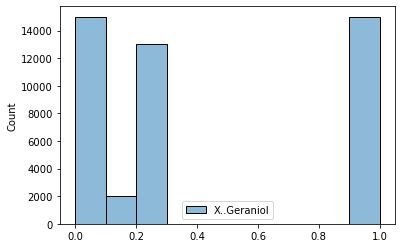

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.058473086419753066

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8779373537608917

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.7954255504073985

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([1.53421385e-04, 1.62465709e-03, 6.02683212e-04, 1.93156360e-04,
       1.30181188e-03, 2.63585904e-03, 5.02902751e-04, 5.26571180e-03,
       1.33390657e-04, 1.80300501e-03, 5.99439305e-04, 3.76651866e-03,
       9.53018209e-04, 1.03108103e-03, 4.38729405e-04, 2.42786886e-04,
       2.03063041e-03, 1.06165919e-03, 5.22001983e-05, 6.42797394e-04,
       2.31862089e-03, 1.25913502e-03, 1.06699709e-03, 1.27242882e-03,
       8.71079858e-04, 2.89958729e-04, 1.69290049e-03, 1.19827265e-04,
       6.73368037e-04, 2.97465645e-04, 5.19114418e-03, 1.41109704e-03,
       1.58004188e-03, 5.25762261e-04, 1.20694215e-03, 1.14936187e-04,
       1.84952568e-04, 7.91497412e-03, 1.24481749e-03, 5.67626920e-04,
       4.47452871e-04, 1.22420639e-03, 1.84592750e-04, 4.41598044e-03,
       2.12365552e-03, 1.23964558e-03, 3.17495333e-03, 1.31289190e-03,
       1.07995986e-03, 7.72221423e-04, 1.43495826e-04, 6.22615007e-04,
       2.96037911e-04, 1.51876158e-03, 1.69842333e-03, 7.18483676e-05,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_5,tfidf_7,tfidf_11,tfidf_20,tfidf_30,tfidf_37,tfidf_43,tfidf_46,tfidf_64,tfidf_69,...,uplifted,cheese,citrus,diesel,earthy,lemon,orange,pungent,skunk,sweet
0,0.145484,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1,1,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.165804,0.0,0.000000,0.0,0.0,0.0,0.191769,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1,0,0,0,0,0,0,0,1,1
3,0.000000,0.0,0.298306,0.0,0.149052,0.0,0.0,0.0,0.000000,0.0,...,1,1,0,0,0,0,0,1,0,1
4,0.107335,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
44996,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.244511,0.0,...,0,0,0,0,0,0,0,0,0,0
44997,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
44998,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_5',
 'tfidf_7',
 'tfidf_11',
 'tfidf_20',
 'tfidf_30',
 'tfidf_37',
 'tfidf_43',
 'tfidf_46',
 'tfidf_64',
 'tfidf_69',
 'tfidf_71',
 'tfidf_73',
 'tfidf_78',
 'tfidf_80',
 'tfidf_90',
 'tfidf_93',
 'tfidf_98',
 'tfidf_101',
 'tfidf_103',
 'tfidf_104',
 'tfidf_107',
 'tfidf_119',
 'tfidf_121',
 'tfidf_122',
 'tfidf_126',
 'tfidf_128',
 'tfidf_130',
 'tfidf_135',
 'tfidf_140',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_158',
 'tfidf_162',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_176',
 'tfidf_178',
 'tfidf_190',
 'tfidf_199',
 'tfidf_203',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_212',
 'tfidf_217',
 'tfidf_222',
 'tfidf_239',
 'tfidf_245',
 'tfidf_247',
 'tfidf_253',
 'tfidf_258',
 'tfidf_260',
 'tfidf_272',
 'tfidf_278',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_289',
 'tfidf_309',
 'tfidf_311',
 'tfidf_312',
 'tfidf_314',
 'tfidf_328',
 'tfidf_329',
 'tfidf_336',
 'tfidf_337',
 'tfidf_340',
 'tfidf_342',
 'tfidf_343

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_geran.pkl")
joblib.dump(selector, "selector_knn_tfidf_geran.pkl")

['selector_knn_tfidf_geran.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.04509333333333332

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.027504095967078188

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.16584358886335698

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9124070021183686

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.8511757687812476

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03519934862563142

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.021709721361442003

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.14734219138265184

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9824280759432209

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8825290387490906

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_geran.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_geran.pkl")

['y_test_knreg_tfidf_geran.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03862458402552537

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.8696575785849858

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.023989744055615124

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.15488622939311011

In [47]:
y_test

,X..Geraniol
25275,0.000000
12561,1.000000
24707,0.000000
25066,0.000000
33429,0.222222
...,...
15262,1.000000
36801,0.222222
44919,0.000000
38317,0.222222


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

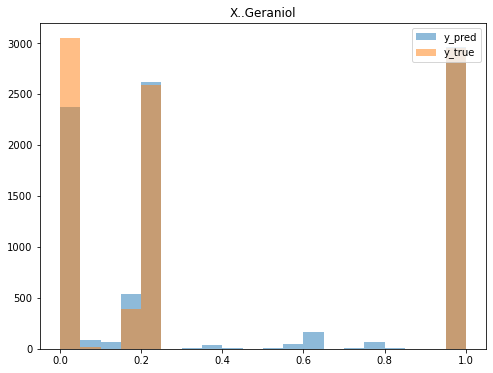

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Geraniol"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_geran.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.936
P-value: 0.000


<AxesSubplot:>

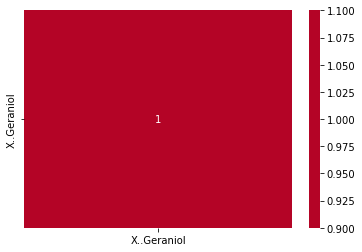

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)